In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

In [2]:
golf_scores = pd.read_csv('jake_golf_scores.csv')

In [3]:
golf_scores.head()

,DateOfRound,Score,Putts,PuttsInsideTenFeetAttempted,PuttsInsideTenFeetMade,PuttsInsideTenFeetMakePercentage,Fairways,Greens,Inside100,UpAndDownAttempts,UpAndDownSuccess,UpAndDownSuccessPercentage
0,6/25/2020,76,36,21,18,85.714286,7,13,43,5,0,0.000000
1,6/26/2020,72,31,19,17,89.473684,11,12,41,6,3,50.000000
2,6/29/2020,70,30,20,16,80.000000,6,11,41,7,3,42.857143
3,6/30/2020,72,33,21,17,80.952381,6,13,43,5,2,40.000000
4,7/1/2020,72,32,17,16,94.117647,6,10,42,8,3,37.500000


In [4]:
golf_scores_num = golf_scores.drop(columns = 'DateOfRound')

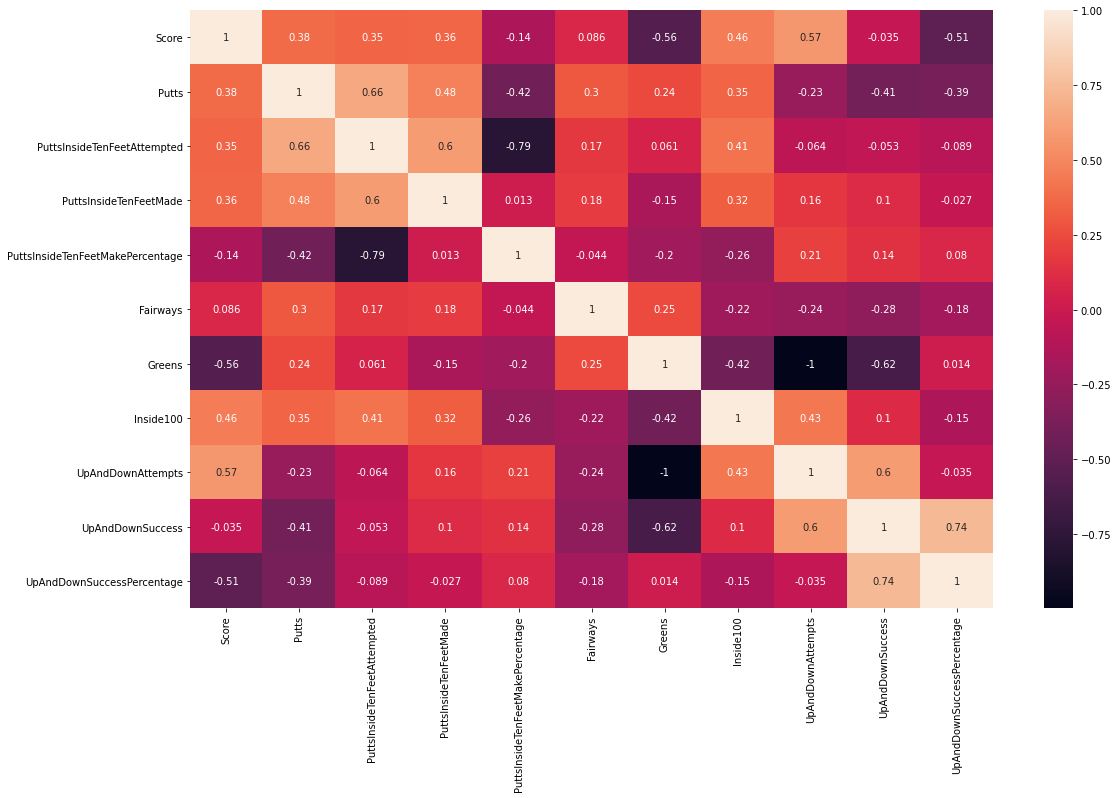

In [7]:
golf_scores_num_correlations = golf_scores_num.corr()
plt.figure(figsize = (18,11))
sns.heatmap(golf_scores_num_correlations, annot = True);

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import linear_model 

In [9]:
base_features = ['Putts', 'PuttsInsideTenFeetAttempted', 'PuttsInsideTenFeetMade', 'PuttsInsideTenFeetMakePercentage', 'Fairways', 'Greens', 'Inside100', 'UpAndDownAttempts', 'UpAndDownSuccess', 'UpAndDownSuccessPercentage']
X = golf_scores_num[base_features]
X

,Putts,PuttsInsideTenFeetAttempted,PuttsInsideTenFeetMade,PuttsInsideTenFeetMakePercentage,Fairways,Greens,Inside100,UpAndDownAttempts,UpAndDownSuccess,UpAndDownSuccessPercentage
0,36,21,18,85.714286,7,13,43,5,0,0.000000
1,31,19,17,89.473684,11,12,41,6,3,50.000000
2,30,20,16,80.000000,6,11,41,7,3,42.857143
3,33,21,17,80.952381,6,13,43,5,2,40.000000
4,32,17,16,94.117647,6,10,42,8,3,37.500000
5,31,21,16,76.190476,6,12,45,6,3,50.000000
6,31,20,17,85.000000,4,10,41,8,5,62.500000
7,30,16,15,93.750000,5,7,44,11,4,36.363636
8,34,20,18,90.000000,10,11,44,7,2,28.571429
9,33,21,17,80.952381,7,12,43,6,2,33.333333


In [10]:
y = golf_scores_num.Score 
y.head()

0    76
1    72
2    70
3    72
4    72
Name: Score, dtype: int64

In [11]:
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 1)
print(train_X.shape, val_X.shape, train_y.shape, val_y.shape)

(29, 10) (8, 10) (29,) (8,)


In [15]:

lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, train_X, train_y, cv = 3)
cv.mean() * 100

20.000000000000004

In [16]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt, train_X, train_y, cv = 3)
cv.mean() * 100

13.703703703703704

In [17]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn, train_X, train_y, cv = 3)
cv.mean() * 100

30.74074074074074

In [18]:
rf = RandomForestClassifier(n_estimators = 500, random_state = 1)
cv = cross_val_score(rf, train_X, train_y, cv = 3)
cv.mean() * 100

30.74074074074074

In [19]:
svc = SVC(probability = True)
cv = cross_val_score(svc, train_X, train_y, cv = 3)
cv.mean() * 100

24.074074074074073

In [20]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 1)
cv = cross_val_score(xgb, train_X, train_y, cv = 3)
cv.mean() * 100

[11:37:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:37:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:37:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


20.370370370370374

In [21]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 1.0)
cv = cross_val_score(lasso, train_X, train_y, cv = 3)
cv.mean() * 100

24.585987265617526

In [24]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
cv = cross_val_score(reg, train_X, train_y, cv = 3)
cv.mean() * -100

52.129525293621896

In [25]:
import eli5
from eli5.sklearn import PermutationImportance
lr.fit(train_X, train_y)
perm = PermutationImportance(lr, random_state = 1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.0500 ± 0.1225,Greens
0 ± 0.0000,UpAndDownSuccess
0 ± 0.0000,UpAndDownAttempts
0 ± 0.0000,Inside100
0 ± 0.0000,Fairways
0 ± 0.0000,PuttsInsideTenFeetMade
0 ± 0.0000,Putts
-0.0250 ± 0.1000,PuttsInsideTenFeetAttempted
-0.0500 ± 0.1225,UpAndDownSuccessPercentage
-0.0500 ± 0.1225,PuttsInsideTenFeetMakePercentage


In [30]:
rf.fit(train_X, train_y)
perm2 = PermutationImportance(rf, random_state = 1).fit(val_X, val_y)
eli5.show_weights(perm2, feature_names = val_X.columns.tolist())

Weight,Feature
0.1000 ± 0.2449,UpAndDownSuccessPercentage
0.0750 ± 0.1225,UpAndDownSuccess
0.0750 ± 0.1225,PuttsInsideTenFeetMakePercentage
0.0750 ± 0.1225,PuttsInsideTenFeetMade
0.0750 ± 0.1225,PuttsInsideTenFeetAttempted
0.0250 ± 0.1000,Inside100
0 ± 0.0000,UpAndDownAttempts
0 ± 0.0000,Greens
0 ± 0.0000,Fairways
0 ± 0.0000,Putts


In [31]:
knn.fit(train_X, train_y)
perm3 = PermutationImportance(knn, random_state = 1).fit(val_X, val_y)
eli5.show_weights(perm3, feature_names = val_X.columns.tolist())

Weight,Feature
0.0750 ± 0.1225,UpAndDownSuccessPercentage
0.0500 ± 0.1225,PuttsInsideTenFeetMakePercentage
0.0250 ± 0.1000,Inside100
0 ± 0.0000,UpAndDownSuccess
0 ± 0.0000,UpAndDownAttempts
0 ± 0.0000,Greens
0 ± 0.0000,Fairways
0 ± 0.0000,PuttsInsideTenFeetMade
0 ± 0.0000,PuttsInsideTenFeetAttempted
0 ± 0.0000,Putts


In [34]:
PredictedScore = 


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').